In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 22 13:11:24 2020

@author: Lappawat
"""
import numpy as np
import random 
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
### Real data [100,103,106,113,115,124,141,146,147,177,212,272,322,411,599,721,827,934,1045]
df = pd.read_csv('out1.csv')
real_infected=df['number of Infect'].values.tolist()
date = np.arange(0,len(real_infected))
print(len(real_infected))

65


In [26]:
### Prediction
############### Parameters ##########################
inft = 5     # initial infected people
length  = 70   # predicted length (days)
meeting  = 6     # 1 infected people can meet 20 people
healed_day= 21    # infected people will be healed in 7 days after being infected

#x=1
H=30000000
M=10000000
R=20000000
# Define 3 classes of people depending on how to response
# 0 H = (Highy responsible)
# 1 M = (Moderately responsible)
# 2 R = (Risky)
Pop       = [H,M,R]
Pop_tot   = sum(Pop)
Rh=0.012
Rm=0.15
Rr=0.32
R_lst     = [Rh,Rm,Rr] # contact rate
init_infect  = [inft,0,0]
#..............................#
for i in range(len(Pop)):
    Pop[i] = Pop[i]-init_infect[i]

#define found_rate
#if found_rate= 0.1    # only 10% of infected people can be found in hospital/quarantine    
found_rate=[]
for i in range(length+1):
    if i == 0: ## day0
        found_rate.append(0.1)
    elif i<10: ## day1-day
        found_rate.append(0.1)
    elif i<55: ## day10-day55
        found_rate.append(0.2)
    else:
        found_rate.append(0.3)

#Day 0
day      = [0]
Normal   = [[] for i in range(len(Pop))] # never being infected
Infect   = [[] for i in range(len(Pop))] # sum of being infected and used to
Hospital = [[] for i in range(len(Pop))] # still being infected and quarantine or in hospital
Spreader = [[] for i in range(len(Pop))] # still being infected but no quarantine
Heal     = [[] for i in range(len(Pop))] # healed Hospital
Immune   = [[] for i in range(len(Pop))] # healed Spreader

for i in range(len(Pop)):
    Normal[i].append(Pop[i])     
    Infect[i].append(init_infect[i])
    Hospital[i].append(init_infect[i]*found_rate[0])
    Spreader[i].append(init_infect[i]*(1-found_rate[0]))
    Heal[i].append(0)                   
    Immune[i].append(0)

for j in range(len(Pop)):
    print('day: %2d   Normal: %10.1f  Infected: %10.1f New_infected: %10.1f' %(0,Normal[j][0],Infect[j][0],init_infect[j]))
    print('        Spreader: %10.1f  Hospital: %10.1f' %(Spreader[j][0],Hospital[j][0]))
    print('         Immuned: %10.1f    Healed: %10.1f' %(Immune[j][0],Heal[j][0]))
        
#begin model
for i in range(length):
    day.append(i+1)
    ### group j meet k
    for j in range(len(Pop)):
        
        ### new infected people (total)
        new_infect = 0
        for k in range(len(Pop)):
            Rate  = R_lst[j]*R_lst[k]*meeting
            new_infect = new_infect + Rate*Spreader[k][-1]*Normal[j][-1]/Pop_tot
        Infect[j].append(Infect[j][-1]+new_infect)

        ### new normal people
        Normal[j].append(Normal[j][-1]-new_infect)
        
        ### new healed people
        if i+1 < healed_day:
            Heal[j].append(0)
            Immune[j].append(0)
            new_healed = 0
            new_immuned = 0
            new_healed_immuned = new_healed+new_immuned
        elif i+1 == healed_day:
            new_healed = Hospital[j][i+1-healed_day]
            Heal[j].append(Heal[j][-1]+new_healed)
            new_immuned = Spreader[j][i+1-healed_day]
            Immune[j].append(Immune[j][-1]+new_immuned)
            new_healed_immuned = new_healed+new_immuned
        else:
            new_healed_immuned = Infect[j][i+1-healed_day]-Infect[j][i+1-healed_day-1]
            new_healed = new_healed_immuned*found_rate[i+1-healed_day]
            new_immuned = new_healed_immuned*(1-found_rate[i+1-healed_day])
            Heal[j].append(Heal[j][-1]+ new_healed)
            Immune[j].append(Immune[j][-1]+new_immuned)
        
        ### new net
        Hospital[j].append(Hospital[j][-1]+new_infect*found_rate[i+1] - new_healed)
        Spreader[j].append(Spreader[j][-1]+new_infect*(1-found_rate[i+1]) - new_immuned)
        
        #print('day: %2d   Normal: %10.1f  Infected: %10.1f New_infected: %10.1f' %(i+1,Normal[j][-1],Infect[j][-1],new_infect))
        #print('        Spreader: %10.1f  Hospital: %10.1f' %(Spreader[j][-1],Hospital[j][-1]))
        #print('         Immuned: %10.1f    Healed: %10.1f New_immuned: %10.1f' %(Immune[j][-1],Heal[j][-1],new_healed_immuned))


day:  0   Normal: 29999995.0  Infected:        5.0 New_infected:        5.0
        Spreader:        4.5  Hospital:        0.5
         Immuned:        0.0    Healed:        0.0
day:  0   Normal: 10000000.0  Infected:        0.0 New_infected:        0.0
        Spreader:        0.0  Hospital:        0.0
         Immuned:        0.0    Healed:        0.0
day:  0   Normal: 20000000.0  Infected:        0.0 New_infected:        0.0
        Spreader:        0.0  Hospital:        0.0
         Immuned:        0.0    Healed:        0.0


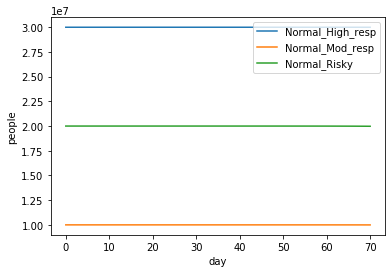

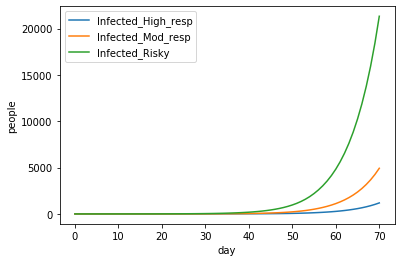

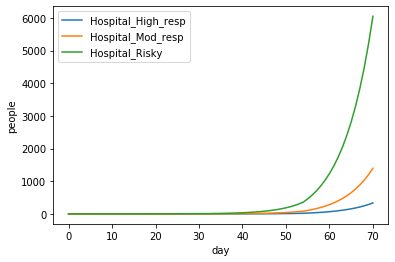

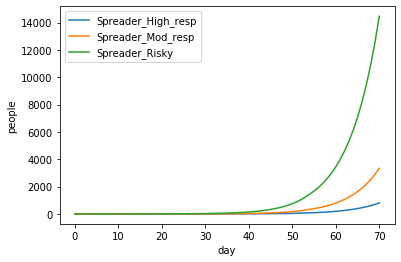

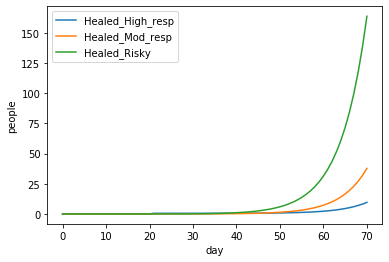

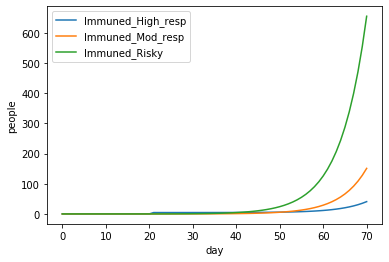

In [27]:
#plots for each groups
ltype = ['High_resp','Mod_resp','Risky']
#plt.plot(date, real_infected, 'ro', label='real')
for j in range(len(Pop)):
    plt.plot(day,Normal[j],'-',label ="Normal_"+ltype[j])
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()
    
for j in range(len(Pop)):
    plt.plot(day,Infect[j],'-',label ="Infected_"+ltype[j])
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()

for j in range(len(Pop)):
    plt.plot(day,Hospital[j],'-',label ="Hospital_"+ltype[j])
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()

for j in range(len(Pop)):
    plt.plot(day,Spreader[j],'-',label ="Spreader_"+ltype[j])
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()

for j in range(len(Pop)):
    plt.plot(day,Heal[j],'-',label ="Healed_"+ltype[j])
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()
    
for j in range(len(Pop)):
    plt.plot(day,Immune[j],'-',label ="Immuned_"+ltype[j])
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()
 


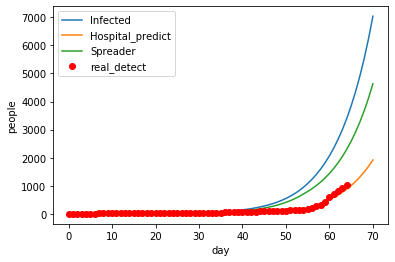

In [25]:
### plot for overall

#changing list into nparray
Normal   = np.array(Normal)
Infect   = np.array(Infect)
Hospital = np.array(Hospital)
Spreader = np.array(Spreader)
Heal     = np.array(Heal)
Immune   = np.array(Immune)
Normal_sum = np.zeros(len(Normal[0]))
Infect_sum = np.zeros(len(Infect[0]))
Hospital_sum = np.zeros(len(Hospital[0]));
Spreader_sum = np.zeros(len(Spreader[0]));
Heal_sum = np.zeros(len(Heal[0]))
Immune_sum = np.zeros(len(Immune[0]))
for j in range(len(Pop)):
    Normal_sum   = Normal_sum   + Normal[j]
    Infect_sum   = Infect_sum   + Infect[j]
    Hospital_sum = Hospital_sum + Hospital[j]
    Spreader_sum = Spreader_sum + Spreader[j]
    Heal_sum     = Heal_sum     + Heal[j]
    Immune_sum   = Immune_sum   + Immune[j]

#plt.plot(day,Normal_sum,'-',label ="Normal")
plt.plot(day,Infect_sum,'-',label ="Infected")
plt.plot(day,Hospital_sum,'-',label ="Hospital_predict",)
plt.plot(day,Spreader_sum,'-',label ="Spreader")
#plt.plot(day,Heal_sum,'-',label ="Healed")
#plt.plot(day,Immune_sum,'-',label ="Immuned")
plt.plot(date,real_infected, 'ro', label='real_detect')
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()
    
